In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [26]:
df = pd.read_csv('bjk_xg.csv',sep=';')

In [27]:
df['xG'] = pd.to_numeric(df['xG'].astype(str).str.replace(',','.'),errors='coerce')
df['Date'] = pd.to_datetime(df['Date'])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    28 non-null     datetime64[ns]
 1   Goal    28 non-null     int64         
 2   xG      28 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 800.0 bytes


In [29]:
df['xg_cumulative'] = df['xG'].cumsum()
df['goal_cumulative'] = df['Goal'].cumsum()

### xG flow chart

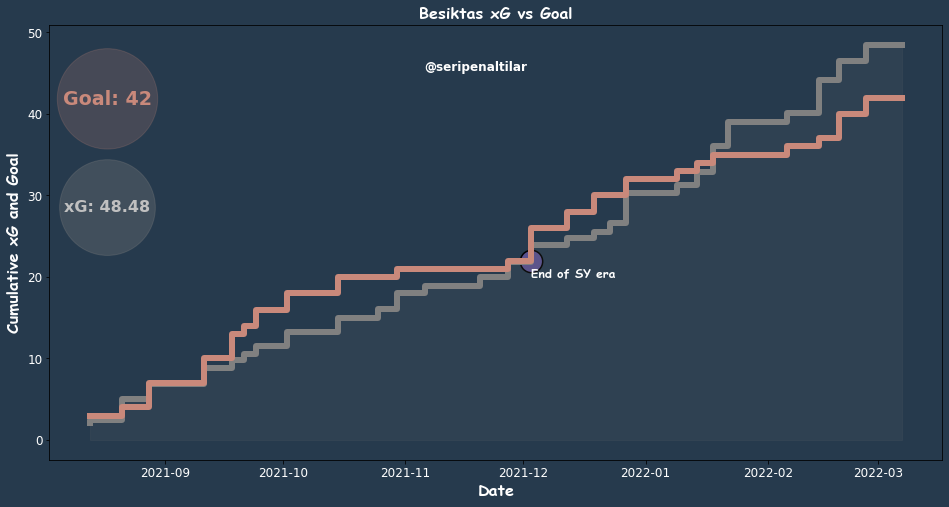

In [31]:
fig,ax = plt.subplots(figsize=(16,8))

ax.scatter(x=df[df['Date']=='2021-12-03']['Date'],y=df[df['Date']=='2021-12-03']['goal_cumulative'], color='#58508d', edgecolor='black',s=500,linewidths=1.5)
ax.annotate('End of SY era',(df[df['Date']=='2021-12-03']['Date'],df[df['Date']=='2021-12-03']['goal_cumulative']-2),
           color='white',weight='bold',family='Comic Sans MS',size=12)


ax.step(x=df['Date'],y=df['xg_cumulative'],c="#808080",linewidth=6)
ax.step(x=df['Date'],y=df['goal_cumulative'],c="#c9897b",linewidth=6)

ax.set_facecolor(color='#263a4d')
fig.patch.set_facecolor('#263a4d')

plt.fill_between(df['Date'],df['xg_cumulative'],alpha=0.1,color="#808080",step='pre')
# in fill_between y should be adjusted depending on which one is more xG or Goal

plt.text(0.065, 0.83, "Goal: {}".format(df['goal_cumulative'].max()), size=19,
         ha="center", va="center",transform=ax.transAxes,
         color="#c9897b",fontweight='bold',
         bbox=dict(boxstyle="circle",color='#c9897b',alpha=0.20)
         )

plt.text(0.065, 0.58, "xG: {}".format(round(df['xg_cumulative'].max(),2)), size=16,
         ha="center", va="center",transform=ax.transAxes,
         color="#C0C0C0",fontweight='bold',
         bbox=dict(boxstyle="circle",color='#808080',alpha=0.30)
         )

font = {'family': 'Comic Sans MS',
       'color': 'white',
       'weight': 'bold',
       'size': 16
       }

plt.xlabel('Date',fontdict=font)
plt.ylabel('Cumulative xG and Goal', fontdict=font)
plt.xticks(fontsize=12,c='white')
plt.yticks(fontsize=12,c='white')
plt.title('Besiktas xG vs Goal',fontdict=font)
plt.grid(False)
plt.figtext(0.45,0.8,'@seripenaltilar',color='white',fontweight="bold",fontsize=12)

plt.show()